In [93]:
import plotly.express as px
import plotly
import plotly.io as pio

import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Plotly plots for IMDb data

Contains plotly plots (that are not embedded in the github repository) and calculations used for story telling related to IMDb. For instance, introductory plots and calculations.

In [94]:
# load data
data_dir = os.getcwd() + os.sep + 'data'
movies = pd.read_csv(rf"{data_dir}{os.sep}IMDb{os.sep}IMDB movies.csv", low_memory=False)

In [95]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


Restrict to Quotebank years

In [96]:
movies = movies[movies.year >= '2015']
movies.year.unique()

array(['2018', '2017', '2016', '2015', '2019', '2020', 'TV Movie 2019'],
      dtype=object)

In [97]:
movies = movies[-(movies.year == 'TV Movie 2019')]
movies.year.unique()

array(['2018', '2017', '2016', '2015', '2019', '2020'], dtype=object)

In [98]:
movies = movies.sort_values(by=('year')
movies['usa_gross_income'] = movies['usa_gross_income'].fillna(0)

**Number of movies per year**

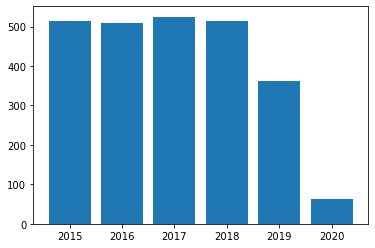

In [99]:
movies_us = movies[movies.usa_gross_income != 0]
groups = movies_us.groupby('year')

plt.bar(groups.size().index, groups.size())
plt.show()

In [128]:
fig = px.bar(x=groups.size().index, y=groups.size(), labels={'x':'Year', 'y':'Number of movies'},
            hover_name=groups.size().index,
            color=groups.size().index,
            color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='<b>%{y}</b>')  
fig.show()

filename = 'yearly_movies'
pio.write_html(fig, rf"{os.getcwd()}{os.sep}plotlyplots{os.sep}{filename}.html")

In [101]:
# total number of movies
movies_us.__len__()

2486

**Box Office revenue per year**

In [102]:
income = pd.Series([income.strip('$') for income in movies_us.usa_gross_income]).astype(np.int64)
movies_us.index = np.arange(len(movies_us))
movies_us['usa_gross_income'] = income

In [104]:
movies_us.usa_gross_income

0        3002884
1         295488
2          48694
3          59333
4       46889293
          ...   
2481     1045418
2482       46855
2483      111552
2484      445000
2485      942666
Name: usa_gross_income, Length: 2486, dtype: int64

In [134]:
fig = px.bar(x=groups.size().index, y=groups.usa_gross_income.sum(), labels={'x':'Year', 'y':'Box Office revenue'},
            hover_name=groups.size().index,
            color=groups.size().index,
            color_discrete_sequence=px.colors.qualitative.Safe, #qualitative.G10,

            ) #sent2box[:,0],
            #color_discrete_sequence=['#B51F1F', '#00A79F'])
            #title='Do the daily sentiment influence the daily Box Office sales?')
fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='<b>%{y}</b>')  
fig.show()

filename = 'yearly_BoxOffice'
pio.write_html(fig, rf"{os.getcwd()}{os.sep}plotlyplots{os.sep}{filename}.html")

In [146]:
movies_us['negative_income'] = -movies_us.usa_gross_income
movies_us = movies_us.sort_values(by=['year', 'negative_income'])

fig = px.bar(x=movies_us.year, y=movies_us.usa_gross_income, labels={'x':'Year', 'y':'Box Office revenue'},
            hover_name=movies_us.original_title,
            color=movies_us.year,
            color_discrete_sequence=px.colors.qualitative.Safe, #qualitative.G10,

            ) #sent2box[:,0],
            #color_discrete_sequence=['#B51F1F', '#00A79F'])
            #title='Do the daily sentiment influence the daily Box Office sales?')
fig.update_layout(showlegend=False)
fig.show()

filename = 'yearly_BoxOfficeByMovie'
pio.write_html(fig, rf"{os.getcwd()}{os.sep}plotlyplots{os.sep}{filename}.html")

In [141]:
# total income
groups.usa_gross_income.sum().sum() 

56429999977

In [112]:
dir(px.colors.qualitative)

['Alphabet',
 'Alphabet_r',
 'Antique',
 'Antique_r',
 'Bold',
 'Bold_r',
 'D3',
 'D3_r',
 'Dark2',
 'Dark24',
 'Dark24_r',
 'Dark2_r',
 'G10',
 'G10_r',
 'Light24',
 'Light24_r',
 'Pastel',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'Pastel_r',
 'Plotly',
 'Plotly_r',
 'Prism',
 'Prism_r',
 'Safe',
 'Safe_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'T10',
 'T10_r',
 'Vivid',
 'Vivid_r',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_cols',
 '_contents',
 '_k',
 '_swatches',
 'swatches']